
#**PROBABILITY AND PROBABILITY DISTRIBUTIONS:**

##Notebook of Week 1 of PRA3500: Statistics/Data Analysis for Physicists

#Part 1: Probability Relations

Instructions:

"*Consider a test which looks for COVID-19 antibodies in the
general population. Let’s assume that 1% of our general population has these antibodies. If we can make a test which is 99% sensitive to the antibodies (i.e. we can
tell 99% of cases as true positives, 1% as false negatives) and give 95% true
negative results (5% are accidentally given a positive result) – it looks like we might be doing pretty well.*"

**Task 1**: Use your programming tool of choice and make a small script which accepts
these data as inputs and returns the probability of a positive test indicating
correctly that this person does indeed have the anti-bodies. 

In [147]:
#GIVEN INFORMATION
p=0.01 #true positive (the person really has antibodies)
n=0.99 #true negative (the person really does not have antibodies)
a=0.99 #if a person has antibodies, the probability that it will also test as pozitive 
b=0.95 #if it does not have antibodies, the probability that the person will also test negative

#CALCULATIONS
p_t=p*a + n*(1-b) #test result positive ("a" amount of people with antibodies (p) and "(1-b)"" amount of people without antibodies (n) will test positive)
n_t=n*b + p*(1-a) #test result negative ("b" amount of people without antibodies (n) and "(1-a)"" amount of people with antibodies (p) will test negative)

#Check (error if #calculations are wrong)
def unity(): 
  u=p_t+n_t #should be 1
  if u!=1:
    return(print("Error in calculations. Sum of positive and negative outcomes of the test does not equal the total number of tests taken.")) 
  if u==1:
    pass
unity()

#RESULTS
#probability of a positive test indicating correctly that this person does indeed has the anti-bodies (a_rev)
a_rev=a*p/p_t #Bayes' theorem (explanation can be found in chapter 2 (equation 2.4) of Bohm's Introduction to Statistics and Data Analysis for Physicists)
#probability of a negative test indicating correctly that this person does indeed does not have the anti-bodies (b_rev)
b_rev=b*n/n_t #Bayes' theorem

#PRINT
print("The probability of a positive test indicating correctly that this person does indeed has the anti-bodies is ", a_rev, ".")
print("The probability of a negative test indicating correctly that this person indeed does not have the anti-bodies is ", b_rev, ".")

The probability of a positive test indicating correctly that this person does indeed has the anti-bodies is  0.16666666666666655 .
The probability of a negative test indicating correctly that this person indeed does not have the anti-bodies is  0.9998936848819903 .


###Interpretation of results: Task 1

The results show that the probability of a positive test indicating correctly that a person does indeed have the anti-bodies is just below 17%. From this we can conclude that the positive outcomes of the test are not to be blindly trusted (most probably that person does not have antibodies, despite the test showing otherwise). On the other hand, if the results of the test are negative, we can be very sure that they are correct. Within the precision of the data given in the task, we can even be sure with 100% certainty that if the results of the test be negative, the person does not have antibodies. 

If this was a real-world situaton, I would recommend that in case of a test coming out as positive, multiple (or alternative) tests be repeated/performed on that person, as the positive result is clearly not a good indicator of the presence of antibodies. Just about 1 in 6 people testing positive would actually have antibodies. If I had limited resources (as one does in real-life) I would on the other hand not repeat tests on cases that turned out negative, as those results clearly are much more accurate.

**Task 2**: Using the same testing kit, how much higher would the fraction of
people with the antibodies have to be in order to give a >50% chance of the kit
giving a positive result? It might be nice to make a graph of this.

When at least about  47.874999999999  percent of population will have antibodies, test will give positive result in 50% of cases.


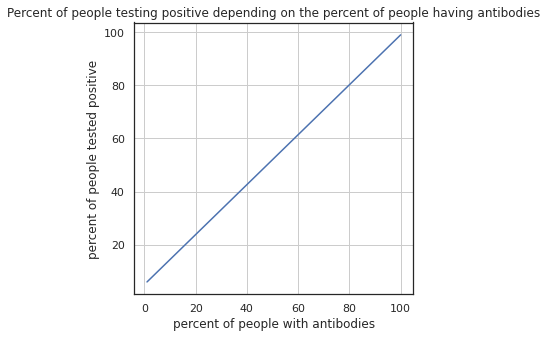

In [149]:
#IMPORTS
import matplotlib.pyplot as plt  #import library
import numpy

#create arrays of the function p_t_1 (test turning out positive) and the variable k (corresponds to the percent of people with antibodies)
p_t_1 = []
k_array = []
count = 0

for k in numpy.arange(1, 100, 0.005): 
  k_array.append(k)
  p_1=p*k #true positive (the person really has antibodies)
  n_1=1-k*p #true negative (the person really does not have antibodies)
  p_t_1.append((p_1*a + n_1*(1-b))*100) #recalculate positive results, with k free parameter
  if 50<p_t_1[count]<50.005:
    print("When at least about ", k, " percent of population will have antibodies, test will give positive result in 50% of cases.")
  count+=1
  #print(p_1)
  #print(n_1)
  #print(p_t_1)
  #print(50<p_t_1)
  #print("""

  #""")

  #plot the graph p_t_1(k)
plt.plot(k_array, p_t_1) #make graph
plt.xlabel('percent of people with antibodies')  #name axis
plt.ylabel('percent of people tested positive') #name axis 
plt.grid() #add grid so it's easier to read off the results
plt.title('Percent of people testing positive depending on the percent of people having antibodies') #give title
plt.show() #show graph

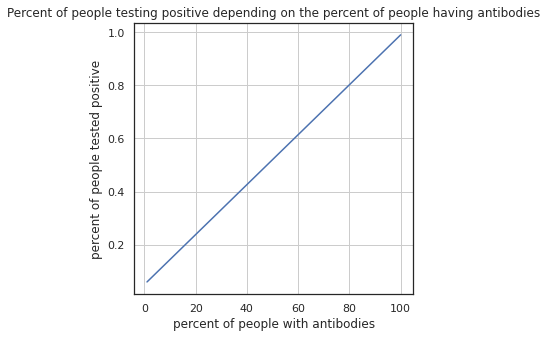

In [150]:
#alternative way of plotting the graph, by explicity writing p_t_1 as a function of k
y = []
for k in k_array:
  y.append(0.0094*k+0.05)
plt.plot(k_array, y) #make graph
plt.xlabel('percent of people with antibodies')  #name axis
plt.ylabel('percent of people tested positive') #name axis 
plt.grid()
plt.title('Percent of people testing positive depending on the percent of people having antibodies') #give title
plt.show() #show graph

In [151]:
#Calculating k explicitly
k=(0.5-0.05)/0.0094
print("When ", k, "% of population will have antibodies, the test will turn out to be positive in 1/2 cases.")

When  47.87234042553192 % of population will have antibodies, the test will turn out to be positive in 1/2 cases.


###Interpretation of Part 2

weciqjdljqlejqli

# Part 2: Probability Distributions

Task 1: Make a script to generate a discrete distribution, with values in the integer
bins. The script should be able to generate a Gaussian, Bionomial, Poisson and an
Exponential distribution – it should always use the same range of values to do so
(i.e. the x-axis should run from 0 to 10 for example).

Task 2: Choose one of the distributions from the task above and make it into a
continuous distribution. You may have to bin it into a histogram to be able to plot
it.

In [0]:
# IMPORT STATEMENTS FOR LIBRARIES

%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")

In [0]:
#IMPORT STATEMENTS FOR DIFFERENT DISTRIBUTIONS

from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=1000,loc=5,scale=1)

from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

from scipy.stats import poisson
data_poisson = poisson.rvs(mu=5, size=1000)

from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.48,size=10000)

In [0]:
#DEFINING FUNCTIONS FOR DISCRETE AND CONTINUOUS DISTRIBUTIONS

#discrete distribution
def plot_graph(which_data, x_axis):
  ax = sns.distplot(which_data,
                  bins=10,
                  norm_hist=True,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel=x_axis, ylabel="probability", xlim=(0,10))

#continuous distribution
def plot_continuous(which_data, x_axis):
  bx = sns.distplot(which_data,
                bins=10,
                hist=False,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth": 15,'alpha':1})
  bx.set(xlabel=x_axis, ylabel='probability', xlim=(0,10))

Below normalised graphs for the gaussian, exponential, poisson and binomial distributions will be generated respectively. For each type of distribution, firstly dicrete and secondly continuous graph will be plotted.

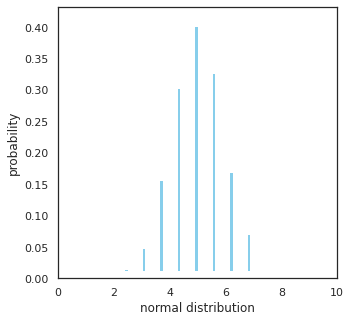

In [165]:
plot_graph(data_normal, "normal distribution")

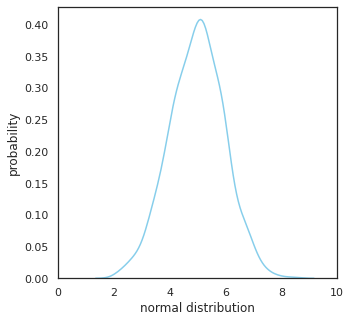

In [168]:
plot_continuous(data_normal, "normal distribution")

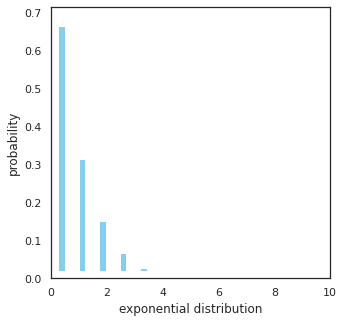

In [169]:
plot_graph(data_expon, "exponential distribution")

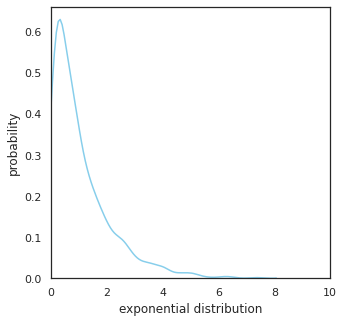

In [170]:
plot_continuous(data_expon, "exponential distribution")

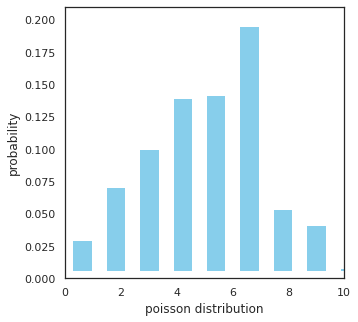

In [178]:
plot_graph(data_poisson, "poisson distribution")

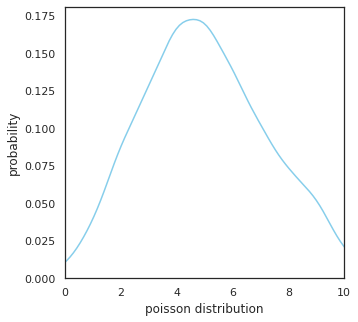

In [177]:
plot_continuous(data_poisson, "poisson distribution")

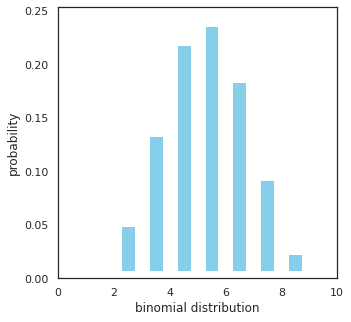

In [179]:
plot_graph(data_binom, "binomial distribution") 

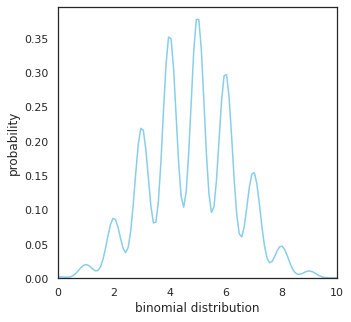

In [180]:
plot_continuous(data_binom, "binomial distribution")

Follow up task: Modify your script to accept two values and return the sum of the
probability distribution function between those values (e.g. so I could ask for the
total of the exponential distribution between 0 and 2 for example)

In [161]:
import scipy.integrate as integrate
result = integrate.quad(lambda x: data_normal, 2, 5)
result

TypeError: ignored

In [156]:
#I want to make a function that sums the y values for a range of x
def sum_values_in_range(which_plot, lower_bound, upper_bound):
  x=[] #range should be the same for all
  y=0 #the y values for a certian graph distribution
  for x in range(lower_bound, upper_bound):
    y=y+f(x)
  print(y)

sum_values_in_range(exponential, 0, 5)


NameError: ignored

###Interpretation 

hwekdqiil

#Part 3: Expectation values


Choose one of your discrete distributions and one of your continuous
distributions from the previous task. Write a small script to take the data from the
histogram and turn it into an expectation value.

###Interpretation of task 1

blablabalhssxdilcuilvuieruifheruiohe

Expectation values are also useful in understanding how game
shows work. Make a small game, which simulates the TV show deal or no deal.
There are 20 boxes (numbered 1-20). The contestant chooses one box to keep and
then opens 3 at random and gets to know the values of these boxes. What is the
expected value of the prize they go home with? They have 1 box out of 17
remaining. Make it simple – the three random boxes don’t have to be chosen by the
user – simply chosen at random from the possibilities.

In [238]:
#to see intermediate steps of the game, uncomment everything
#please read the illuminating output; 'expectation value' is really not the most likely value, but purely an average. Naming is very misleading.

import random
import statistics
boxes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#print(boxes)
original_box=random.choice(boxes)
#print(original_box)
boxes.remove(original_box)
#print(boxes)
box_1=random.choice(boxes)
#print(box_1)
boxes.remove(box_1)
#print(boxes)
box_2=random.choice(boxes)
#print(box_2)
boxes.remove(box_2)
#print(boxes)
box_3=random.choice(boxes)
#print(box_3)
boxes.remove(box_3)
#print(boxes)
boxes.append(original_box)
#print(boxes)
def expectation_value(decimal):
  y=statistics.mean(boxes)
  return round(y, decimal)
#print(expectation_value(2))
print("God knows that the contestant put aside box with value ", original_box, 
      ". Then, as the whole show knows, the contestant picked 3 boxes with values ", 
      box_1, ", ", box_2, " and ", box_3,  " respectively. The expectation value of the 17 unopened boxes is ", 
      expectation_value(2), ". However, ", expectation_value(0), 
      " is not the most likely value that's hidden in the unopened box, but purely an average of the remaining boxes." 
      "The numbers close to the mean have in this distribution really nothing to do with how likely one is to pick such a value."
      " Naming 'expectation value' is unfortunately very misleding.")

God knows that the contestant put aside box with value  10 . Then, as the whole show knows, the contestant picked 3 boxes with values  19 ,  9  and  16  respectively. The expectation value of the 17 unopened boxes is  9.76 . However,  10.0  is not the most likely value that's hidden in the unopened box, but purely an average of the remaining boxes.The numbers close to the mean have in this distribution really nothing to do with how likely one is to pick such a value. Naming 'expectation value' is unfortunately very misleding.


###Interpretation of task 2

baksdlwieufqeuifqepfuipquie

#Part 3: Messy real world

Take your script which outputs your distribution and have it print the expectation
value, the mean value, the variance, skewness and kurtosis. 

###Interpretation

biefluifeiauf